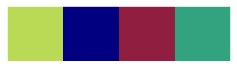

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('dark')

#define a custom palette
customPalette = ['#bada55', '#000080', '#901e40', '#33a27f']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
# Import my spotify data
songs = pd.read_csv("deDuplicatedTracksFromMyPlaylists.csv", encoding = "latin-1")

songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 18 columns):
added_at            2918 non-null object
name                2918 non-null object
artist              2918 non-null object
id                  2918 non-null object
popularity          2918 non-null int64
danceability        2918 non-null float64
energy              2918 non-null float64
loudness            2918 non-null float64
speechiness         2918 non-null float64
acousticness        2918 non-null float64
tempo               2918 non-null float64
liveness            2918 non-null float64
valence             2918 non-null float64
instrumentalness    2918 non-null float64
key                 2918 non-null int64
time_signature      2918 non-null int64
mode                2918 non-null int64
duration_ms         2918 non-null int64
dtypes: float64(9), int64(5), object(4)
memory usage: 410.5+ KB


In [5]:
# songs = songs.drop(['energy','valence','tempo'],axis=1)
songs = songs.drop('added_at', axis = 1)
songs.head()

,name,artist,id,popularity,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,instrumentalness,key,time_signature,mode,duration_ms
0,Saturdays (feat. HAIM),Twin Shadow,5ClqcvP4dYDDX6Zv3jPQD1,60,0.470,0.696,-4.749,0.1040,0.06590,169.976,0.0962,0.8020,0.000039,9,4,1,205442
1,Saint,Blood Orange,2PzWUwFXApjQBZzKMl4Hd6,56,0.795,0.629,-8.704,0.0745,0.04300,100.803,0.3780,0.0667,0.000154,5,4,0,192010
2,Everyone Acts Crazy Nowadays,Unknown Mortal Orchestra,6VPvz8SZWRFEoawyUTvQTt,51,0.816,0.755,-4.942,0.0828,0.47300,120.008,0.1780,0.7350,0.000003,8,4,1,254973
3,Less Is More,Choices,7MWJzAWFWT1ZSvf3D2dQrG,30,0.831,0.808,-5.002,0.0604,0.00635,121.994,0.2030,0.4900,0.314000,2,4,1,314754
4,Springtime,Ivana Parnasso,13FRCyzRG702n4PBpl0sot,2,0.792,0.577,-8.826,0.1160,0.16300,89.954,0.0476,0.6950,0.010300,1,4,1,268412


In [6]:
# to describe numerical features we can use describe()
songs.describe()

,popularity,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,instrumentalness,key,time_signature,mode,duration_ms
count,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2.918000e+03
mean,36.180946,0.594897,0.614839,-8.310820,0.073753,0.269307,119.051086,0.180449,0.476206,0.128008,5.200480,3.925977,0.622344,2.475762e+05
std,22.914415,0.162993,0.214534,3.895897,0.083081,0.298538,27.216910,0.149654,0.246041,0.262880,3.582024,0.360936,0.484884,8.580904e+04
min,0.000000,0.000000,0.000076,-37.264000,0.000000,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.480000e+03
25%,17.000000,0.492000,0.474000,-9.862750,0.034400,0.025400,99.935500,0.093925,0.278000,0.000004,2.000000,4.000000,0.000000,2.005045e+05
50%,40.000000,0.611000,0.640000,-7.518000,0.043800,0.134000,117.688000,0.121000,0.473000,0.000649,5.000000,4.000000,1.000000,2.324730e+05
75%,54.000000,0.711000,0.782000,-5.734250,0.072200,0.463750,133.969000,0.218000,0.670750,0.063000,8.000000,4.000000,1.000000,2.760768e+05
max,91.000000,0.975000,0.998000,1.342000,0.958000,0.996000,216.101000,0.974000,1.000000,0.992000,11.000000,5.000000,1.000000,1.395733e+06


The loudness feature is from -60db to 0 so we will normalise this column between 0 and 1 The tempo feature is in BPM so we will scale between 0 and 1 as well.

In [7]:
from sklearn import preprocessing

loudness = songs[['loudness']].values
min_max_scaler = preprocessing.MinMaxScaler()
loudness_scaled = min_max_scaler.fit_transform(loudness)
songs['loudness'] = pd.DataFrame(loudness_scaled)

tempo = songs[['tempo']].values
min_max_scaler = preprocessing.MinMaxScaler()
tempo_scaled = min_max_scaler.fit_transform(tempo)
songs['tempo'] = pd.DataFrame(tempo_scaled)


songs.describe()

,popularity,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,instrumentalness,key,time_signature,mode,duration_ms
count,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2918.000000,2.918000e+03
mean,36.180946,0.594897,0.614839,0.749966,0.073753,0.269307,0.550905,0.180449,0.476206,0.128008,5.200480,3.925977,0.622344,2.475762e+05
std,22.914415,0.162993,0.214534,0.100914,0.083081,0.298538,0.125945,0.149654,0.246041,0.262880,3.582024,0.360936,0.484884,8.580904e+04
min,0.000000,0.000000,0.000076,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.480000e+03
25%,17.000000,0.492000,0.474000,0.709767,0.034400,0.025400,0.462448,0.093925,0.278000,0.000004,2.000000,4.000000,0.000000,2.005045e+05
50%,40.000000,0.611000,0.640000,0.770502,0.043800,0.134000,0.544597,0.121000,0.473000,0.000649,5.000000,4.000000,1.000000,2.324730e+05
75%,54.000000,0.711000,0.782000,0.816706,0.072200,0.463750,0.619937,0.218000,0.670750,0.063000,8.000000,4.000000,1.000000,2.760768e+05
max,91.000000,0.975000,0.998000,1.000000,0.958000,0.996000,1.000000,0.974000,1.000000,0.992000,11.000000,5.000000,1.000000,1.395733e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DA60D4B348>,
      dtype=object)

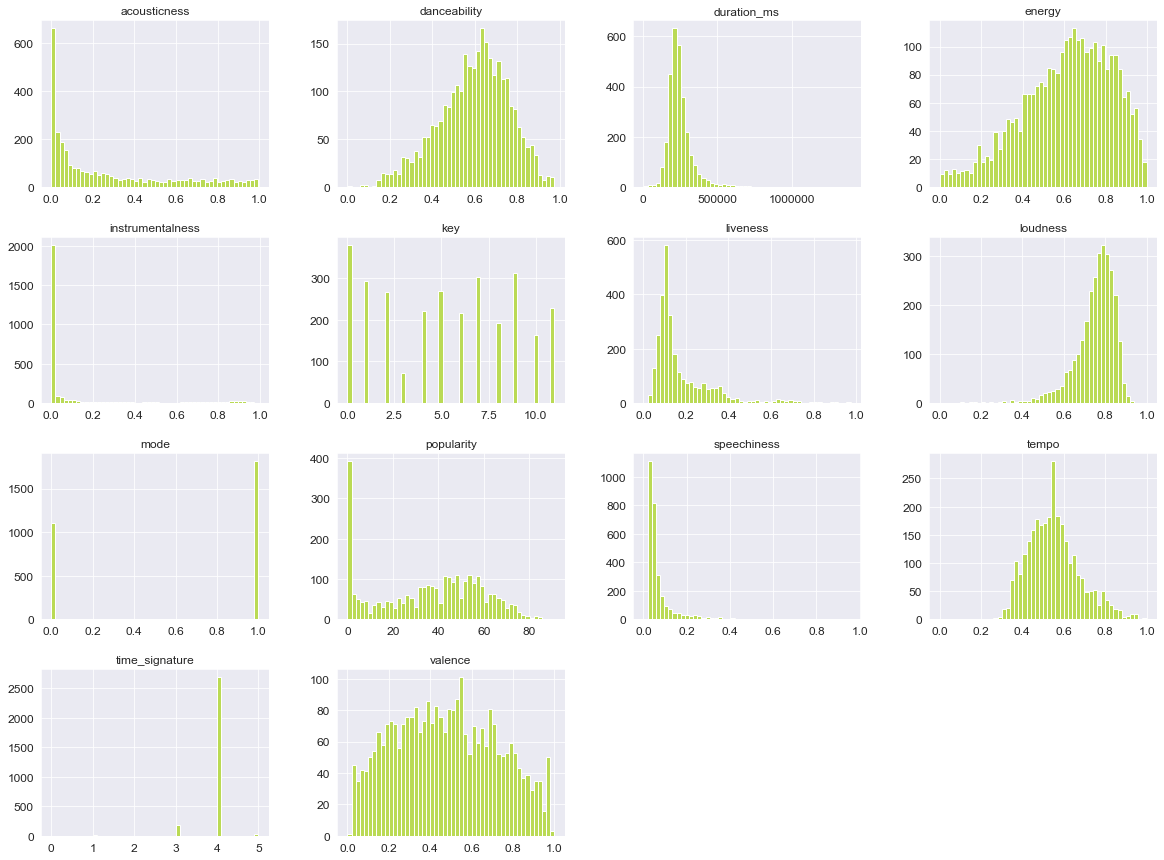

In [8]:
songs.hist(bins=50,figsize=(20,15))

Most features are skewed to the left or the right

In [9]:
# from pandas.plotting import scatter_matrix
# # attributes should contain the features we want to compare
# attr = ['danceability','energy','loudness','speechiness','acousticness','tempo','liveness','valence']

# scatter_matrix(songs[attr],figsize=(12,8))

In [10]:
# remove song names, artist, id and other features before clustering
songs_features = songs.copy()
songs_features = songs_features.drop(['name','artist','id', 'key', 'time_signature', 'mode', 'popularity', 'duration_ms'],axis=1)

songs_features.head()

,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,instrumentalness
0,0.470,0.696,0.842227,0.1040,0.06590,0.786558,0.0962,0.8020,0.000039
1,0.795,0.629,0.739781,0.0745,0.04300,0.466462,0.3780,0.0667,0.000154
2,0.816,0.755,0.837227,0.0828,0.47300,0.555333,0.1780,0.7350,0.000003
3,0.831,0.808,0.835673,0.0604,0.00635,0.564523,0.2030,0.4900,0.314000
4,0.792,0.577,0.736621,0.1160,0.16300,0.416259,0.0476,0.6950,0.010300


In [15]:
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    sum_of_squared_distances.append(km.inertia_)

In [16]:
from sklearn.metrics import silhouette_score
for n_clusters in range(2,15):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_
    print('cluster:', clusterer)
    print('preds:', preds)
    print('centers:', centers)

cluster: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
preds: [1 1 1 ... 1 1 1]
centers: [[0.51875324 0.37732761 0.65962197 0.07124307 0.68937738 0.52168042
  0.15882274 0.33336188 0.18178712]
 [0.62301783 0.70255373 0.78333072 0.07468043 0.1141713  0.56169771
  0.18843609 0.52895974 0.10814684]]
cluster: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
preds: [0 0 0 ... 0 0 0]
centers: [[0.62300584 0.70314187 0.78822294 0.07741594 0.11952645 0.56012279
  0.18952673 0.53588459 0.02631707]
 [0.51620521 0.36223665 0.65840935 0.0740657  0.71478292 0.51934917
  0.16028871 0.33041027 0.10744233]
 [0.59917391 0.63907333 0.72464872 0.05314812 0.19413115 0.56382305
  0.17131014 0.4426687  0.72393043]]
cluste

cluster: KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
preds: [ 4  9  3 ... 10 10 10]
centers: [[0.67364828 0.71331034 0.74524257 0.05372828 0.13805712 0.55818185
  0.15641793 0.70264828 0.69187586]
 [0.55699621 0.4872803  0.73081482 0.06353182 0.53446591 0.53970299
  0.14869318 0.30036932 0.03719004]
 [0.55453896 0.63929156 0.73201679 0.05221883 0.12185499 0.57786354
  0.18396558 0.2617961  0.74575325]
 [0.64824034 0.65675966 0.76195821 0.08534206 0.41562232 0.54012997
  0.17662446 0.69116738 0.01587552]
 [0.68485882 0.78248    0.80416509 0.06813341 0.07434748 0.56450815
  0.16101765 0.79125882 0.02587998]
 [0.73980716 0.5827989  0.76097758 0.099173   0.09428598 0.52983274
  0.12813361 0.55347658 0.02763126]
 [0.60465517 0.72981897 0.78695289 0.10738707 0.11654309 0.52643731
  0.65148276 0.50258448 0.035725  ]
 [0.65508553 0.39408487 0.678

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of. Note that Silhouette Coefficient is only defined if number of labels is 2 <= n_labels <= n_samples - 1.
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [17]:
score = silhouette_score(songs_features, preds, metric='euclidean')
print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 14, silhouette score is 0.1543047317868633)


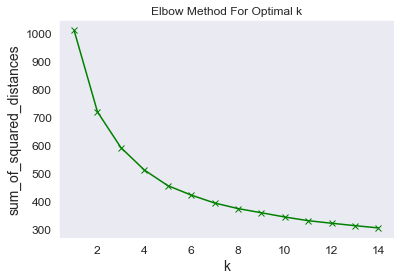

In [18]:
plt.plot(K, sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [54]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(songs_features)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [55]:
# PCA to reduce our data to 2 dimensions for visualization
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)


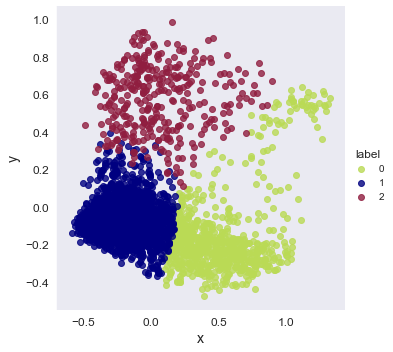

In [56]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [57]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

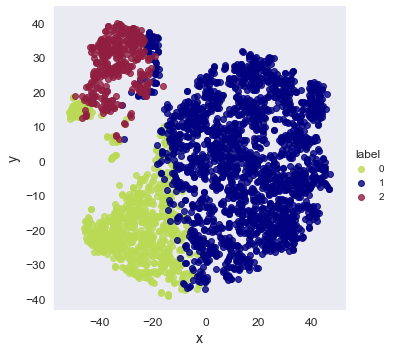

In [58]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

With some assistance from: https://builtin.com/data-science/unsupervised-learning-python

In [59]:
# We can also cluster using DBSCAN
from sklearn.cluster import DBSCAN

# Declaring Model
dbscan = DBSCAN()

# Fitting
dbscan.fit(songs_features)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


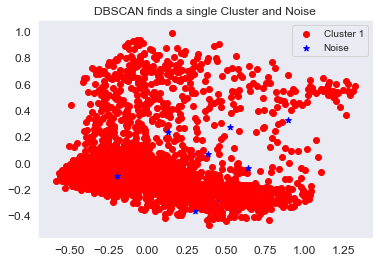

In [60]:
# Transforming Using PCA
pca = PCA(n_components=2).fit(songs_features)
pca_2d = pca.transform(songs_features)

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    print(dbscan.labels_[i])
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='o')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='+')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c3], ['Cluster 1', 'Noise'])
plt.title('DBSCAN finds a single Cluster and Noise')
plt.show()

In [61]:
pca.explained_variance_ratio_


array([0.3996506 , 0.20050684])

The explained variance tells you how much information (variance) can be attributed to each of the principal components. By looking at the explained_variance_ratio_ it does not appear that we have retained as much variance as I would have liked.

In [62]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))

      danceability    energy  loudness  speechiness  acousticness     tempo  \
PC-1     -0.172169 -0.483990 -0.194268    -0.013608      0.716620 -0.064148   
PC-2     -0.098936  0.121665 -0.033206    -0.044422     -0.312798  0.043185   

      liveness   valence  instrumentalness  
PC-1 -0.046462 -0.376828          0.190707  
PC-2  0.002955 -0.237715          0.903387  


### Now let's explore the 4 clusters and see what songs they contain

In [63]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

1    1876
0     697
2     345
Name: label, dtype: int64

In [64]:
songs[songs['label'] == 0].head(40)

,name,artist,id,popularity,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,instrumentalness,key,time_signature,mode,duration_ms,label
2280,Big Government Is Bad-Vote Republican!,The Ultra Right Wing Conservatives,4hMXU51ikeAcsaSRW9Ix7K,0,0.610,0.250,0.660182,0.1200,0.761000,0.644463,0.1180,0.419,0.000000,4,3,1,94840,0
472,Yeanoh (Powe'hande Binga'dbe),Kondi Band,7L667oKoPNZZQW6AMuxK9a,42,0.852,0.431,0.683521,0.0678,0.707000,0.485902,0.3520,0.593,0.013700,6,4,0,326606,0
1025,Goldeneye,Tina Turner,528QhCT2v3HgD71RmrSUNW,51,0.653,0.510,0.690929,0.0266,0.004560,0.472094,0.0730,0.373,0.000355,11,4,0,288400,0
1699,Slather,Bassnectar,4IqL1AydaC96TlBWOu2ZCZ,0,0.596,0.942,0.878698,0.0531,0.000228,0.648363,0.7200,0.106,0.893000,11,4,0,202286,0
2837,Bennie And The Jets,Miguel,4YwTyGTWpUPyIykESGhUm1,0,0.620,0.740,0.815391,0.0448,0.009220,0.601177,0.3150,0.248,0.000000,0,4,1,310053,0
1606,Grow,Odessa,0iGYPWmnVLailUBh3Iq2b7,26,0.324,0.437,0.712739,0.0367,0.620000,0.650011,0.3290,0.273,0.011400,2,3,1,273880,0
571,ThÃ© Ã la menthe,La Caution,2eDvflMCe9ssOkUJrxqikB,45,0.648,0.880,0.879889,0.2040,0.007810,0.458253,0.0618,0.959,0.000000,8,4,0,224147,0
544,Que Sera,Wax Tailor,0lnfcWRREvnGtXPP2ZDeq7,60,0.714,0.721,0.834456,0.0805,0.273000,0.383733,0.1740,0.419,0.240000,9,4,1,164093,0
83,ÐÑÐ·ÑÐºÐ° Ð·Ð²ÑÑÐ¸Ñ,Hanna,10qKJE8fbmjnbgwKsmCwB3,48,0.802,0.720,0.816738,0.0952,0.329000,0.509077,0.1890,0.688,0.000000,11,4,0,220364,0
162,Kaputt,Destroyer,56dIfld2EW00CPbB3zA6GE,47,0.647,0.721,0.734238,0.0341,0.075500,0.508869,0.1690,0.546,0.121000,4,4,1,377973,0


In [65]:
songs[songs['label']==0].mean()

popularity              37.248207
danceability             0.592416
energy                   0.617709
loudness                 0.749849
speechiness              0.071466
acousticness             0.276746
tempo                    0.545506
liveness                 0.178349
valence                  0.466350
instrumentalness         0.115275
key                      5.163558
time_signature           3.946915
mode                     0.595409
duration_ms         246088.274032
label                    0.000000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DA6AD14248>,
      dtype=object)

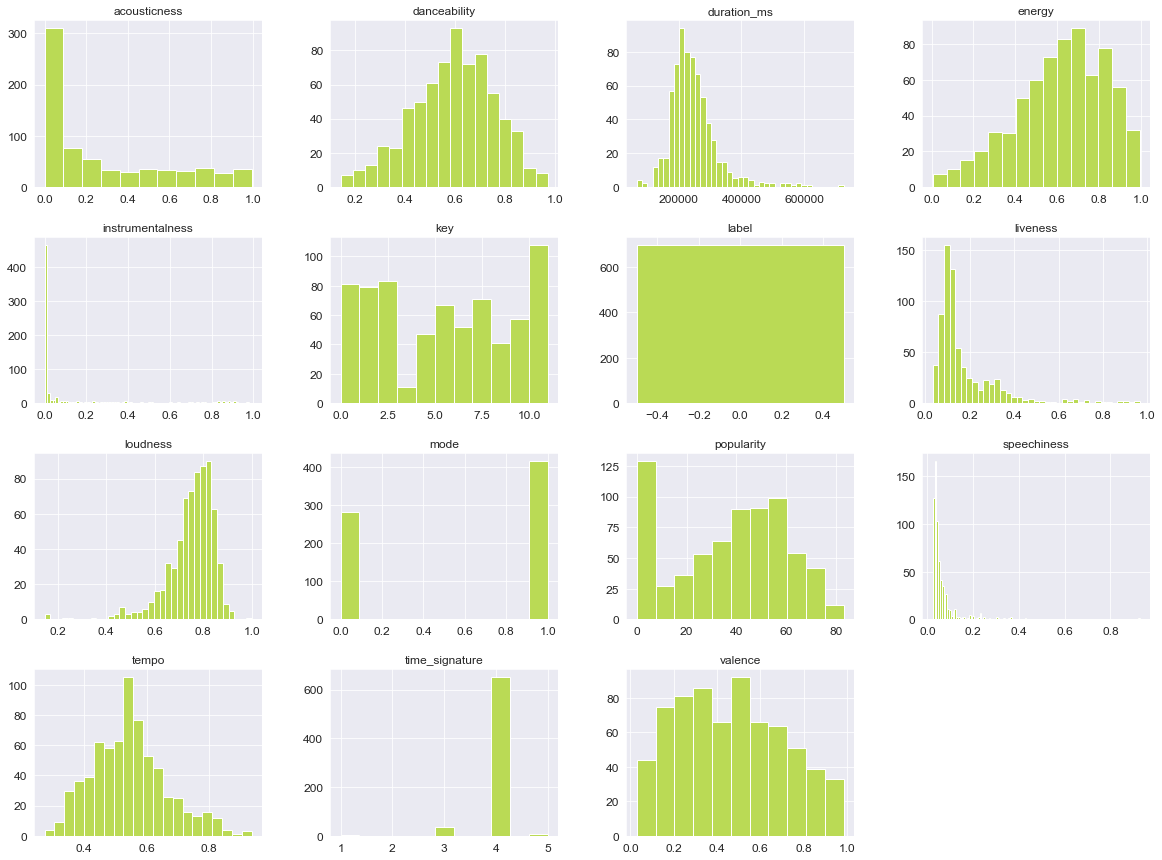

In [66]:
songs[songs['label']==0].hist(bins = 'auto', figsize=(20,15))

In [67]:
songs[songs['label']==1].head(40)

,name,artist,id,popularity,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,instrumentalness,key,time_signature,mode,duration_ms,label
2124,Twist Of Cain,Danzig,25ZH79eefRHT8CUo15UFjo,49,0.5270,0.664,0.726908,0.0615,0.007460,0.551973,0.0973,0.3570,0.000611,1,4,0,258360,1
2180,The Bad Touch,Bloodhound Gang,5EYdTPdJD74r9EVZBztqGG,69,0.8310,0.735,0.803243,0.0384,0.003970,0.569081,0.1230,0.9700,0.020500,0,4,0,260507,1
2630,Cute,DRAM,4lizkSMsv8pFvdFsN35ZiY,36,0.7200,0.624,0.730819,0.0571,0.506000,0.346907,0.1000,0.6510,0.000004,8,4,1,243200,1
399,Movies,Weyes Blood,31LKL7XfxR1PTm6Or9KTKv,56,0.0903,0.362,0.733953,0.0337,0.646000,0.345806,0.1060,0.0964,0.402000,7,4,0,353732,1
1166,Real Love Baby,Father John Misty,6YDf6QV7QfCEo8O2dbWalK,66,0.4170,0.687,0.797285,0.0372,0.095500,0.944512,0.0989,0.6270,0.027800,7,4,1,189293,1
427,Bring My Flowers Now,Tanya Tucker,7nx130yomv3fvvFD0fcGOG,48,0.5570,0.198,0.708517,0.0461,0.948000,0.619261,0.2170,0.3360,0.000009,4,4,1,260360,1
2663,Give A Little Love,Noah And The Whale,50IpkltW01zmwxGwYZoPcj,34,0.5320,0.409,0.662954,0.0271,0.317000,0.524907,0.0789,0.3030,0.015100,3,4,0,255000,1
2828,Player,Dessert,6fI1TDzv6W60JbmLfSzOSQ,0,0.6950,0.843,0.788297,0.0710,0.096500,0.555051,0.0860,0.5920,0.122000,6,4,1,177096,1
666,Sex & Drugs & Rock & Roll,Ian Dury,1PwB9EADXS90I8LoewLXfl,12,0.8350,0.711,0.673859,0.0417,0.499000,0.485384,0.0663,0.9250,0.000000,9,4,1,187573,1
340,Somethin' Stupid,Frank Sinatra,4feXcsElKIVsGwkbnTHAfV,68,0.2570,0.338,0.631042,0.0357,0.736000,0.959533,0.2520,0.5440,0.000000,4,4,1,162493,1


In [68]:
songs[songs['label']==1].mean()

popularity              35.745736
danceability             0.597385
energy                   0.613512
loudness                 0.750950
speechiness              0.073488
acousticness             0.267228
tempo                    0.551918
liveness                 0.179583
valence                  0.480838
instrumentalness         0.128987
key                      5.205224
time_signature           3.924840
mode                     0.630064
duration_ms         246715.254264
label                    1.000000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DA69680188>,
      dtype=object)

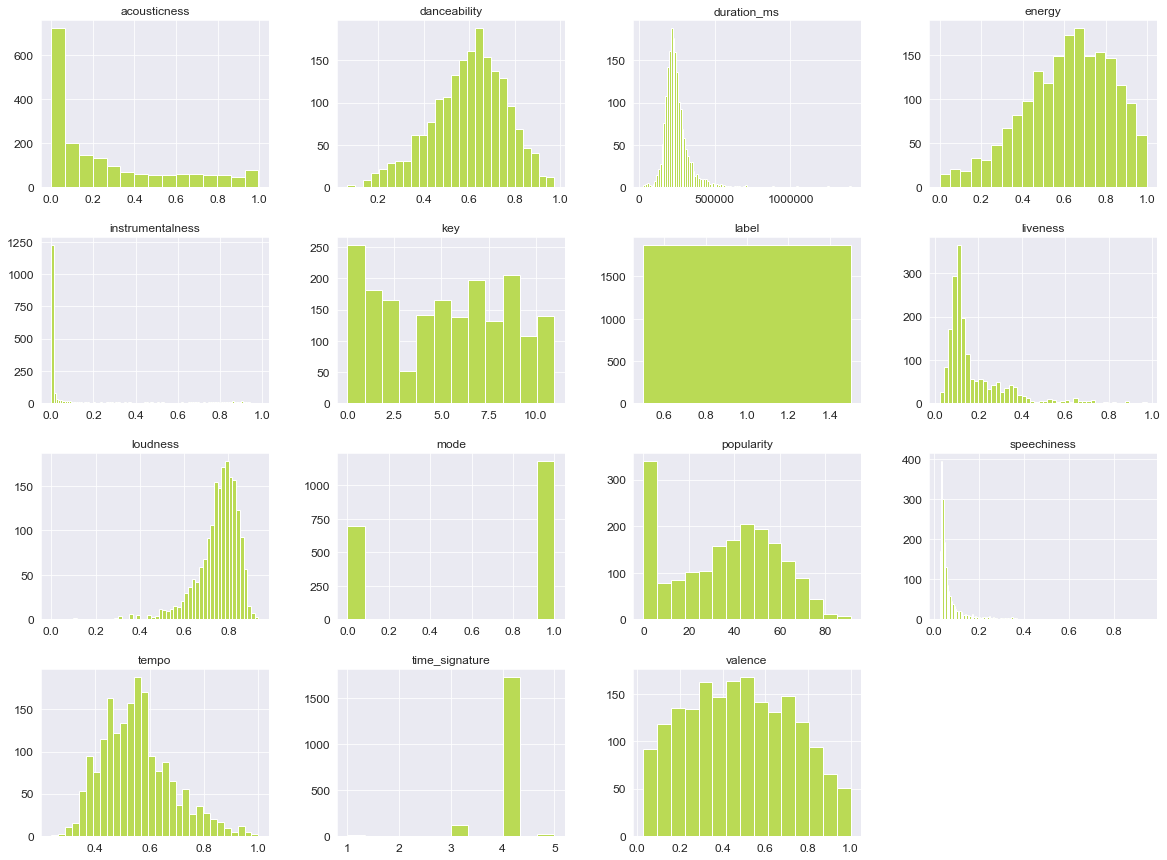

In [69]:
songs[songs['label']==1].hist(bins = 'auto', figsize=(20,15))

In [70]:
songs[songs['label']==2].head(40)

,name,artist,id,popularity,danceability,energy,loudness,speechiness,acousticness,tempo,liveness,valence,instrumentalness,key,time_signature,mode,duration_ms,label
1315,Where The Streets Have No Name - Remastered,U2,7h1YqA5MZrRxmkUFpukRcp,57,0.492,0.7090,0.715018,0.0359,0.011300,0.582131,0.1530,0.2640,0.005640,2,4,1,336613,2
524,La Grange - 2019 Remaster,ZZ Top,1MVqP6dzp0EZ2T4TpAxWnS,39,0.554,0.6430,0.690722,0.1960,0.004520,0.747308,0.1330,0.5510,0.034300,4,4,0,232507,2
1337,Give Yourself A Try,The 1975,40QQZP6LVXUP5h79Q5Yvke,1,0.331,0.7840,0.835673,0.0561,0.000031,0.846660,0.4270,0.9020,0.000000,11,4,1,197672,2
1535,Compulsive Liar,Ezra Furman,54a3f21LiT2Dx5VLGAtB1O,27,0.725,0.2820,0.611822,0.1090,0.387000,0.453427,0.1130,0.3940,0.003760,0,4,1,165000,2
2743,Still Here - feat. Gita Langley,Rae & Christian,7b5ouV1IhdizHvK22mquAA,0,0.637,0.5370,0.684945,0.0306,0.070300,0.536712,0.0831,0.4180,0.016000,0,4,1,317388,2
964,Friends in Low Places,Kings of the River,3YfgxICmLEzoM87JX9MR5a,52,0.783,0.6210,0.762783,0.0283,0.246000,0.495130,0.0753,0.6780,0.000009,9,4,1,229956,2
236,Omen - Radio Edit,Disclosure,78EQ5LZGgviMU9k0zrqv1r,67,0.671,0.7860,0.839429,0.1400,0.115000,0.490775,0.3630,0.6210,0.000000,8,4,1,196817,2
1418,Say It - Clean Bandit Remix,Flume,5GzTHvSE2d57RVCZUPHmLU,37,0.771,0.6350,0.828990,0.0402,0.036700,0.601561,0.0711,0.3120,0.004500,1,4,1,330636,2
910,We Get Through Somehow,Wild Mountain Mystics,3Jr9F3dLmVz4Aeroud4ZsR,0,0.412,0.3260,0.629850,0.0293,0.781000,0.676804,0.1660,0.3210,0.000007,2,3,1,209162,2
1399,The Big Ocean,Ben Sollee,2dGjvFzxQ6bpGyssyzSv5z,38,0.409,0.0370,0.231881,0.0850,0.848000,0.388827,0.1110,0.0857,0.895000,5,4,1,147970,2


In [71]:
songs[songs['label']==2].mean()

popularity              36.391304
danceability             0.586379
energy                   0.616254
loudness                 0.744850
speechiness              0.079818
acousticness             0.265589
tempo                    0.556302
liveness                 0.189403
valence                  0.470933
instrumentalness         0.148410
key                      5.249275
time_signature           3.889855
mode                     0.634783
duration_ms         255263.689855
label                    2.000000
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002DA6A930E88>,
      dtype=object)

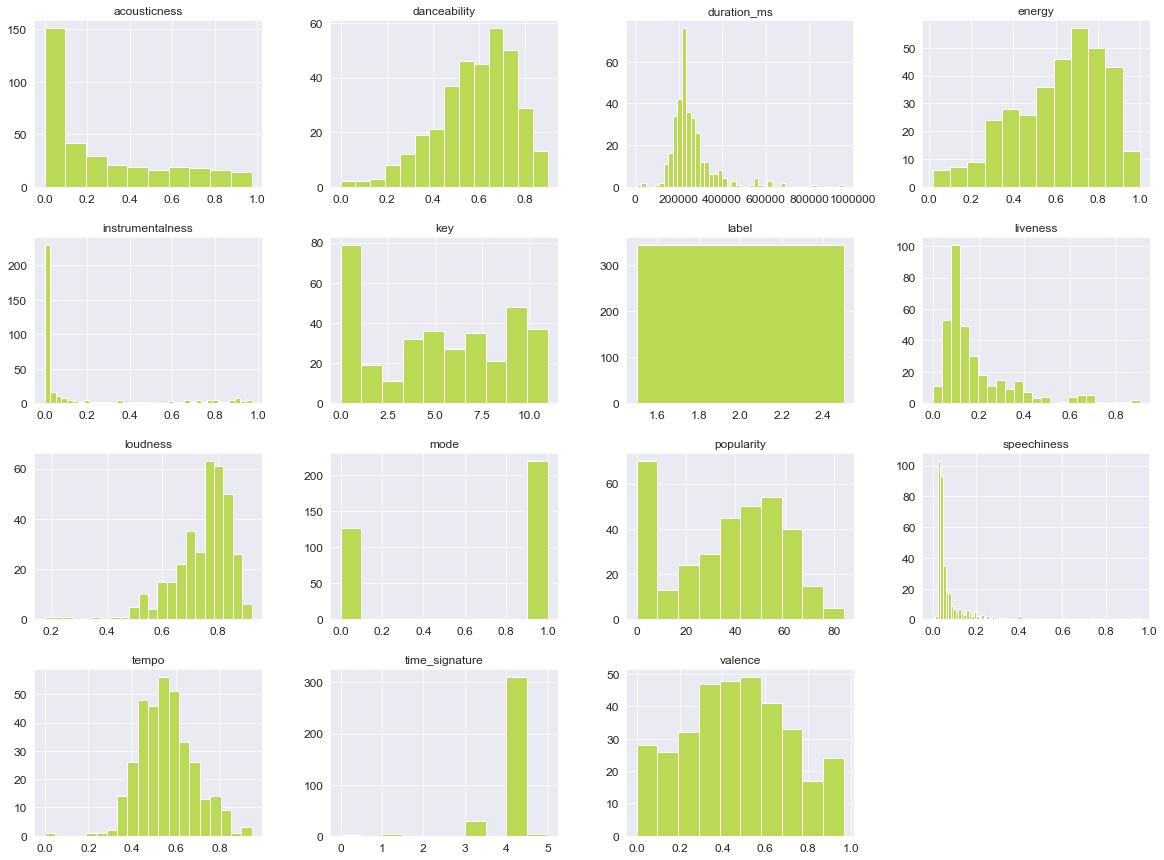

In [72]:
songs[songs['label']==2].hist(bins = 'auto', figsize=(20,15))

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

X = songs_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [74]:
# Predicting the Test set results
y_pred = rfc.predict(X_test)

In [75]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[206  14   1]
 [  4 609   0]
 [  4   2 123]]


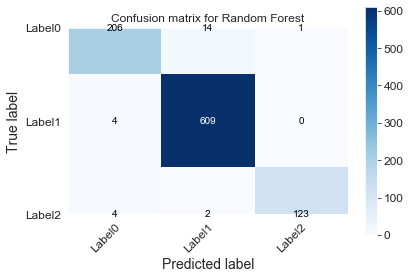

In [76]:
# Confusion matrix
definitions = ['Label0','Label1','Label2']
# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [77]:
# View a list of the features and their importance scores
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('danceability', 0.01964541134502105),
 ('energy', 0.1457071175257308),
 ('loudness', 0.06551140094634726),
 ('speechiness', 0.012696304623590334),
 ('acousticness', 0.3890496880191116),
 ('tempo', 0.01520698555581084),
 ('liveness', 0.011729841161553034),
 ('valence', 0.047832975883380854),
 ('instrumentalness', 0.2926202749394542)]

In [78]:
# View a list of the features and their importance scores
features = songs_features.columns
list(zip(songs_features[features], rfc.feature_importances_))

[('danceability', 0.01964541134502105),
 ('energy', 0.1457071175257308),
 ('loudness', 0.06551140094634726),
 ('speechiness', 0.012696304623590334),
 ('acousticness', 0.3890496880191116),
 ('tempo', 0.01520698555581084),
 ('liveness', 0.011729841161553034),
 ('valence', 0.047832975883380854),
 ('instrumentalness', 0.2926202749394542)]

In [79]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training sets
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [82]:
knn_pred = knn.predict(X_test)

Confusion matrix, without normalization
[[202  16   3]
 [  6 607   0]
 [  4   1 124]]


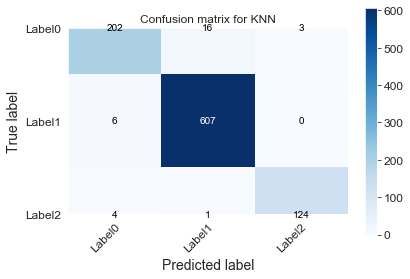

In [83]:
plot_confusion_matrix(y_test, knn_pred, classes=definitions,
                      title='Confusion matrix for KNN')

In [84]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
svm = svm.SVC(kernel="linear") 

#Train the model using the training sets
svm.fit(X_train, y_train)

#Predict the response for test dataset
svm_pred = svm.predict(X_test)

Confusion matrix, without normalization
[[214   7   0]
 [  0 613   0]
 [  0   5 124]]


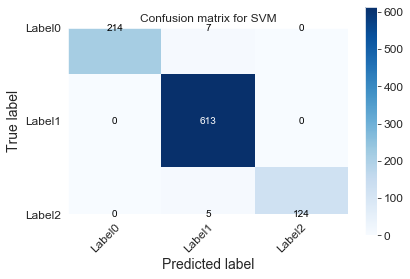

In [85]:
plot_confusion_matrix(y_test, svm_pred, classes=definitions,
                      title='Confusion matrix for SVM')

In [86]:
from sklearn.neural_network import MLPClassifier

In [87]:
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

C:\Users\My Computer\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [88]:
mlp_pred = mlp.predict(X_test)

Confusion matrix, without normalization
[[216   5   0]
 [  1 611   1]
 [  0   3 126]]


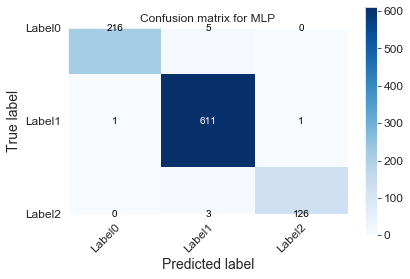

In [89]:
plot_confusion_matrix(y_test, mlp_pred, classes=definitions,
                      title='Confusion matrix for MLP')

In [90]:
print(classification_report(y_test,mlp_pred,target_names=definitions)+'MLP')

              precision    recall  f1-score   support

      Label0       1.00      0.98      0.99       221
      Label1       0.99      1.00      0.99       613
      Label2       0.99      0.98      0.98       129

    accuracy                           0.99       963
   macro avg       0.99      0.98      0.99       963
weighted avg       0.99      0.99      0.99       963
MLP


In [91]:
print(classification_report(y_test,svm_pred,target_names=definitions)+'SVM')

              precision    recall  f1-score   support

      Label0       1.00      0.97      0.98       221
      Label1       0.98      1.00      0.99       613
      Label2       1.00      0.96      0.98       129

    accuracy                           0.99       963
   macro avg       0.99      0.98      0.98       963
weighted avg       0.99      0.99      0.99       963
SVM


In [92]:
print(classification_report(y_test,knn_pred,target_names=definitions)+'KNN')

              precision    recall  f1-score   support

      Label0       0.95      0.91      0.93       221
      Label1       0.97      0.99      0.98       613
      Label2       0.98      0.96      0.97       129

    accuracy                           0.97       963
   macro avg       0.97      0.96      0.96       963
weighted avg       0.97      0.97      0.97       963
KNN


In [93]:
print(classification_report(y_test,y_pred,target_names=definitions)+'forest')

              precision    recall  f1-score   support

      Label0       0.96      0.93      0.95       221
      Label1       0.97      0.99      0.98       613
      Label2       0.99      0.95      0.97       129

    accuracy                           0.97       963
   macro avg       0.98      0.96      0.97       963
weighted avg       0.97      0.97      0.97       963
forest
